In [1]:
import pandas as pd
import numpy as np
import quandl
import os
items = ["WIKI/INTC", "WIKI/QCOM", "WIKI/NVDA", "WIKI/TXN", "WIKI/BRCM", "WIKI/GOOG"]
stock_data = "stock_data"

# if directory does not exist, create & download the data
if not os.path.exists(stock_data):
    os.makedirs(stock_data)
    for item in items:
        data = quandl.get(item)
        fileName = os.path.join(stock_data, item[5:]+".csv")
        with open(fileName, 'w+') as f:
            data.to_csv(f)

In [2]:
qcom = os.path.join(stock_data, "QCOM.csv")

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object
            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume
Date                                                               
1991-12-16   0.399293   0.452929  0.399293    0.429091  143667200.0
1991-12-17   0.441010   0.441010  0.417172    0.423131   16176000.0
            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume
Date                                                               
2018-01-03      65.22      66.06     64.69       65.94    6721391.0
2018-01-04      66.18      66.53     65.91       66.03    5035323.0
            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2006-01-03  33.696017  34.55

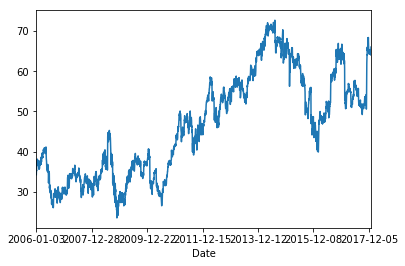

In [3]:
import matplotlib.pyplot as plt
qcom_data = pd.read_csv(qcom, index_col= [0], header=0, parse_dates=[1])
qcom_data['Open'] = qcom_data.Open.astype(float)
print(qcom_data.dtypes)
#qcom_data = qcom_data.drop(['Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1)
qcom_data = qcom_data.drop(['Ex-Dividend', 'Split Ratio', 'Open', 'High', 'Close', 'Low', 'Volume'], axis=1)

print(qcom_data[:2])
print(qcom_data[-2:])

qcom_data = qcom_data.loc['2006-01-01':]
print(qcom_data[:2])
print(qcom_data.dtypes)
plt.figure()
qcom_data['Adj. Close'].plot()
plt.show()

Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object


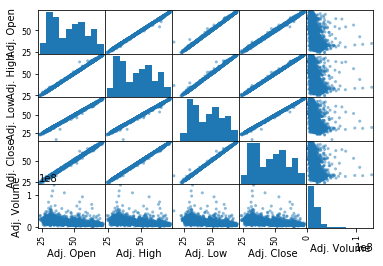

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
print(qcom_data.dtypes)
#qcom_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
#plt.show()
scatter_matrix(qcom_data)
plt.show()

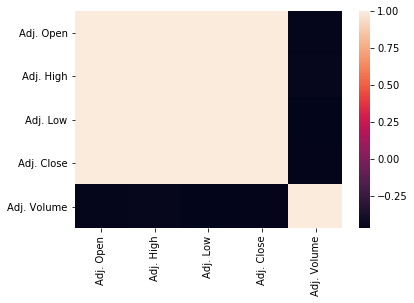

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

corrdata = qcom_data.corr()

sb.heatmap(corrdata,
            xticklabels=corrdata.columns.values,
            yticklabels=corrdata.columns.values)
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

stockData = qcom_data
print(stockData.dtypes)
X = stockData.drop(['Adj. Close'], axis=1)
y = stockData[['Adj. Close']]#.astype(np.int64)
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scaled = scalerX.fit_transform(X[X.columns])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled = scalerY.fit_transform(y[y.columns])
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)
print("Inputs ares : ")
print(X_scaled.dtypes)
print(y_scaled.dtypes)

Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object
Inputs ares : 
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Volume    float64
dtype: object
Adj. Close    float64
dtype: object


In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

def score(predicted, true_label):
    return math.sqrt(mean_squared_error(true_label, predicted))

#baseline model
def run_baseline(inputs, day_label):
    # predict day's label for next day
    return day_label

In [74]:
import matplotlib.pyplot as plt
import datetime

def get_datetime_from_str(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

def get_gap_in_months(start_date, end_date):
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

def plot_graph(ax, test_dates, prediction, actual):
    print("Test dates start {} end {}".format(test_dates[0], test_dates[-1]))
    start_date = get_datetime_from_str(test_dates[0])
    end_date = get_datetime_from_str(test_dates[-1])
    num_months = get_gap_in_months(start_date, end_date)
    print(num_months)

    ax.set_xticklabels('')
    #ax.set_xticks([datetime.date(start_year+int(i/12),1+i%12,1) for i in range(num_months)])
    ax.set_xticks([datetime.date(start_date.year+int(i),1,1) for i in range(1+int(num_months/12))])
    ax.set_xticklabels([datetime.date(start_date.year+int(i),1,1).strftime('%Y')  for i in range(1+int(num_months/12))])
    ax.plot(test_dates.astype(datetime.datetime), prediction, 'r-', label = 'predicted')
    ax.plot(test_dates.astype(datetime.datetime), actual, 'g-.', label = 'actual')
    ax.legend(loc='upper right', shadow=True).get_frame().set_facecolor('0.8')


(3021, 4)
1007
Index(['Adj. Close'], dtype='object')
(2012, 1)
   Adj. Close  Adj. Close
0   39.544281   39.157641
1   39.157641   40.292883
2   40.292883   40.695976
3   40.695976   40.547901
4   40.547901   39.889790
(2012, 1)
(2012, 1)
Test dates start 2010-01-06 end 2018-01-04
96
PredictedValueDf Shape: (2012, 1)
TrueValueDf Shape: (2012, 1)
2014
Index(['Adj. Close'], dtype='object')
(1005, 1)
   Adj. Close  Adj. Close
0   64.106831   64.583003
1   64.583003   64.970995
2   64.970995   65.173809
3   65.173809   65.138537
4   65.138537   64.565367
(1005, 1)
(1005, 1)
Test dates start 2014-01-07 end 2018-01-04
48
PredictedValueDf Shape: (1005, 1)
TrueValueDf Shape: (1005, 1)
[0.8599890819549174, 0.9627239818315342]


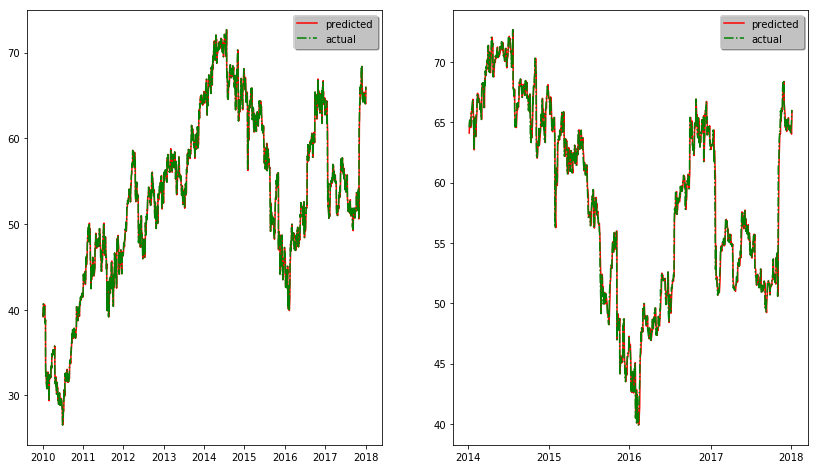

In [75]:
from sklearn.model_selection import TimeSeriesSplit

split_count = 2
tsSplit = TimeSeriesSplit(n_splits=split_count)
scores = []
print(X_scaled.shape)
plt.close('all')
fig, ax = plt.subplots(1,split_count, figsize=(14,8))

#def do_baseline(train_index, test_index):
for train_index, test_index in tsSplit.split(X_scaled):
    print(len(train_index))
    X_train, X_test = X_scaled[0:len(train_index)], X_scaled[1+len(train_index):]
    y_train, y_test = y_scaled[0:len(train_index)], y_scaled[1+len(train_index):]
    predictedScaled = run_baseline(X_test[:], y_test[:])
    predictedScaled = predictedScaled[:-1]
    print(predictedScaled.columns)
    print(predictedScaled.shape)
    test_dates = stockData.index.values[1+len(train_index):]
    predicted = scalerY.inverse_transform(predictedScaled[predictedScaled.columns])
    predicted_df = pd.DataFrame(predicted, columns=predictedScaled.columns)
    trueValueScaled = y_test[1:]
    test_dates = test_dates[1:]
    trueValue = scalerY.inverse_transform(trueValueScaled[trueValueScaled.columns])
    trueValue_df = pd.DataFrame(trueValue, columns=trueValueScaled.columns)
    xy = pd.concat([predicted_df, trueValue_df], axis=1)
    print(xy[:5])
    print((predicted.shape))
    print((trueValue.shape))
    plot_graph(ax[len(scores)], test_dates, predicted, trueValue)
    #ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    print("PredictedValueDf Shape: {}".format(predicted_df.shape))
    print("TrueValueDf Shape: {}".format(trueValue_df.shape))
    scores.append(score(predicted_df, trueValue_df))

print(scores)
plt.show()


(2921, 201)
(2921,)
(2921, 201)
test_dates (1945,) vs dates (2921,)
Shapes of y_hat (1945,) and y (1945,)
Test dates start 2009-11-17 end 2017-08-10
93
test_dates (972,) vs dates (2921,)
Shapes of y_hat (972,) and y (972,)
Test dates start 2013-10-01 end 2017-08-10
46


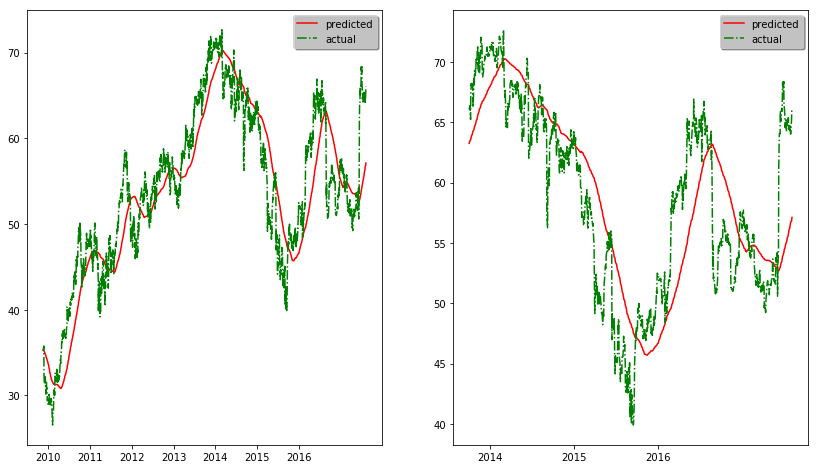

[4.270971452492955, 4.818864102888195]


In [76]:
from sklearn.model_selection import TimeSeriesSplit

# print(qcom_data.iloc[:4]['Adj. Close'])
# print(qcom_data.iloc[:4]['Adj. Close'].shift(-1))
# temp = pd.DataFrame()
# temp['c1'] = qcom_data.iloc[:]['Adj. Close']
# temp['c2'] = qcom_data.iloc[:]['Adj. Close'].shift(-1)

# temp = temp.reset_index().drop(['Date'], axis=1)
# print(temp[:4])
# print(temp.dtypes)
split_count = 2
plt.close('all')
fig, ax = plt.subplots(1, split_count, figsize=(14,8))

def prepareData(stock_data, n_days):
    df = pd.DataFrame()
    for i in range(n_days):
        closeCol = 'c' + str(i);
        volCol = 'v' + str(i);
        df[closeCol] = stock_data.iloc[:]['Adj. Close'].shift(-i)
        df[volCol] = stock_data.iloc[:]['Adj. Volume'].shift(-i)
    df['y'] = stock_data.iloc[:]['Adj. Close'].shift(-n_days)
    #df = df.reset_index().drop(['Date'], axis=1)
    df = df.dropna()
    print(df.shape)
    return df

def baseline_model(df, n_days):
    # predict close as of last known or the mean of n_days
    useAverage = True
    #temp = df
    result = df.drop(['y'], axis=1)
    #result['yt'] = temp['y']
    if (useAverage is True):
        c_cols = []
        for i in range(n_days):
            c_cols.append('c' + str(i))
        result['y'] = df[c_cols].mean(axis=1)
    else:
        col = 'c' + str(n_days-1)
        result['y'] = df[:][col]        
    #print("Results here:")
    #print(result)
    #result.drop(['yt'], axis=1, inplace=True)
    return result
    
def baseline_model_validation(df, n_days, splits, dates):
    tsSplit = TimeSeriesSplit(n_splits=splits)
    baseline_scores = []
    for train_index, test_index in tsSplit.split(df):
        scaler_train = MinMaxScaler(feature_range=(0, 1))
        scaler_test = MinMaxScaler(feature_range=(0, 1))
        train, test = df[0:len(train_index)], df[1+len(train_index):]
        train_scaled = scaler_train.fit_transform(train[df.columns])
        train_scaled = pd.DataFrame(train_scaled, columns=df.columns)
        test_scaled = scaler_test.fit_transform(test[df.columns])
        test_scaled = pd.DataFrame(test_scaled, columns=df.columns)
        test_dates = dates[1+len(train_index):]
        print("test_dates {} vs dates {}".format(test_dates.shape, dates.shape))

        actual = test_scaled
        predicted = baseline_model(test_scaled, n_days)
        y_hat = scaler_test.inverse_transform(predicted)
        y_hat_df = pd.DataFrame(y_hat, columns=predicted.columns)
        y = scaler_test.inverse_transform(actual)
        y_df = pd.DataFrame(y, columns=actual.columns)

        print("Shapes of y_hat {} and y {}".format(y_hat_df['y'].shape, y_df['y'].shape))
        plot_graph(ax[len(baseline_scores)], test_dates, y_hat_df['y'], y_df['y'])

        baseline_scores.append(score(y_hat_df['y'], y_df['y']))
    plt.show()
    print(baseline_scores)

history = 100
temp_data = qcom_data
#temp_data = temp_data[:8]
#print(temp_data.shape)
#print(temp_data)
d = prepareData(temp_data, history)
dates = d.index.values
d = d.reset_index().drop(['Date'], axis=1)
print(dates.shape)
print(d.shape)
#print(d)
baseline_model_validation(d, history, split_count, dates)


In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt

def prepare_lstm_data(stockdf, history):
    num_samples = stockdf.shape[0] - history
    num_features = stockdf.shape[1]
    X_train = np.zeros((num_samples, history, num_features))
    y_train = np.zeros((num_samples))
    
    for i in range(num_samples):
        y_pos = i + history
        X_train[i] = stockdf[i:y_pos]
        y_train[i] = stockdf['Adj. Close'][y_pos]

    return (X_train, y_train)

def model_validation(df, n_days, splits, dates):
    plt.close('all')
    fig, ax = plt.subplots(1,splits, figsize=(14,8))

    tsSplit = TimeSeriesSplit(n_splits=splits)
    lstm_scores = []
    for train_index, test_index in tsSplit.split(df):
        scaler_train = MinMaxScaler(feature_range=(0, 1))
        scaler_test = MinMaxScaler(feature_range=(0, 1))
        train, test = df[0:len(train_index)], df[1+len(train_index):]
        train_scaled = scaler_train.fit_transform(train[df.columns])
        train_scaled = pd.DataFrame(train_scaled, columns=df.columns)
        test_scaled = scaler_test.fit_transform(test[df.columns])
        test_scaled = pd.DataFrame(test_scaled, columns=df.columns)

        X_train, y_train = prepare_lstm_data(train_scaled, n_days)
        X_test, y_test = prepare_lstm_data(test_scaled, n_days)
        test_dates = dates[1+len(train_index):-n_days]

        print("X train {} and test {}".format(X_train.shape, X_test.shape))
        model = Sequential()
        model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        #model.add(LSTM(256, input_dim=4096, input_length=16))
        model.add(LSTM(256))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mae', optimizer='adam')
        print(model.summary())
        model.fit(X_train, y_train, #validation_data=(X_test, y_test),
                  epochs=10, batch_size=10)
        predicted = model.predict(X_test)
#         print("test_dates shape {} vs y_hat shape {} vs y_test shape {}" \
#               .format(test_dates.shape, y_hat.shape, y_test.shape))

        y_test = y_test.reshape(-1,1)
        print("Reshaped predicted {} and y_test {}".format(predicted.shape, y_test.shape))

        y_hat = scaler_test.inverse_transform(predicted)
        y_hat_df = pd.DataFrame(y_hat, columns=["y_hat"])
        y_actual = scaler_test.inverse_transform(y_test)
        y_actual_df = pd.DataFrame(y_actual, columns=["y"])
        labels_df = pd.concat([y_hat_df, y_actual_df], axis=1)
        print(labels_df[:5])
        print(predicted[:5])
        print(y_test[:5])

        plot_graph(ax[len(lstm_scores)], test_dates, y_hat, y_actual)
        lstm_scores.append(score(y_hat_df['y_hat'], y_actual_df['y']))
    plt.show()
    print(lstm_scores)



In [78]:
import matplotlib.pyplot as plt

def do_next_day_prediction_on_history(n_history):
    split_count = 2
    print(qcom_data.columns)
    temp_data = qcom_data.drop(['Adj. Open', 'Adj. High', 'Adj. Low'], axis=1)
    temp_data = temp_data.drop(['Adj. Volume'], axis=1)
    #temp_data = qcom_data
    print(temp_data.columns)
    dates = qcom_data.index.values
    print(dates.shape)
    model_validation(temp_data[:100], n_history, split_count, dates[:100])

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'], dtype='object')
Index(['Adj. Close'], dtype='object')
(3021,)
X train (24, 10, 1) and test (55, 10, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 10, 20)            1760      
_________________________________________________________________
lstm_44 (LSTM)               (None, 256)               283648    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 285,665.0
Trainable params: 285,665
Non-trainable params: 0.0
_________________________________________________________________
None
Epoch 1/10
24/24 [==============================] - 5s - loss: 0.5945     
Epoch 2/10
2

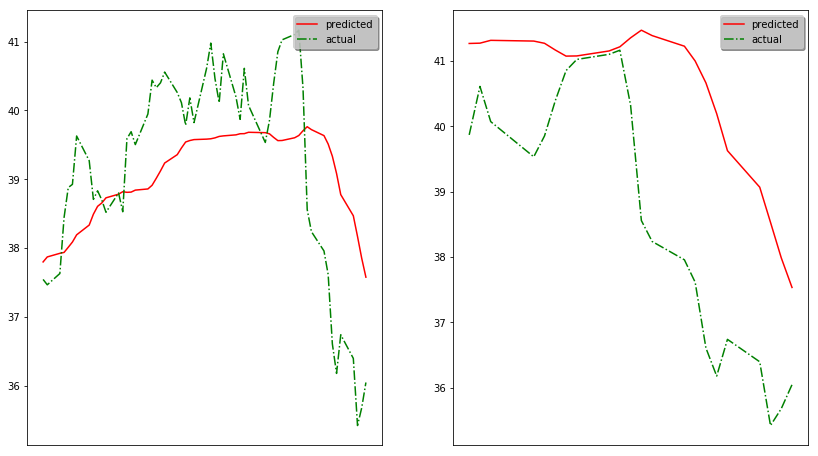

[1.2258436548247282, 2.303476470465745]


In [79]:
do_next_day_prediction_on_history(10)
#[1.043005275481809, 1.0550654954881733] for 10 history

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt

def prepare_future_prediction_lstm_data(stockdf, history, after = 5):
    num_samples = stockdf.shape[0] - history - after
    num_features = stockdf.shape[1]
    X_train = np.zeros((num_samples, history, num_features))
    y_train = np.zeros((num_samples))
    
    for i in range(num_samples):
        y_pos = i + history
        X_train[i] = stockdf[i:y_pos]
        if (after != 0):
            y_train[i] = stockdf['Adj. Close'][i+after]

    return (X_train, y_train)

def run_model_for_future_prediction(df, n_days, splits, dates, after = 10):
    plt.close('all')
    fig, ax = plt.subplots(1,splits, figsize=(14,8))

    tsSplit = TimeSeriesSplit(n_splits=splits)
    lstm_scores = []
    for train_index, test_index in tsSplit.split(df):
        scaler_train = MinMaxScaler(feature_range=(0, 1))
        scaler_test = MinMaxScaler(feature_range=(0, 1))
        train, test = df[0:len(train_index)], df[1+len(train_index):]
        train_scaled = scaler_train.fit_transform(train[df.columns])
        train_scaled = pd.DataFrame(train_scaled, columns=df.columns)
        test_scaled = scaler_test.fit_transform(test[df.columns])
        test_scaled = pd.DataFrame(test_scaled, columns=df.columns)

        X_train, y_train = prepare_future_prediction_lstm_data(train_scaled, n_days, after)
        X_test, y_test = prepare_future_prediction_lstm_data(test_scaled, n_days, after)
        test_dates = dates[1+len(train_index):-n_days]

        print("X train {} and test {}".format(X_train.shape, X_test.shape))
        model = Sequential()
        model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        #model.add(LSTM(256, input_dim=4096, input_length=16))
        model.add(LSTM(256))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mae', optimizer='adam')
        print(model.summary())
        model.fit(X_train, y_train, #validation_data=(X_test, y_test),
                  epochs=5, batch_size=10)
        prediction_after_days = model.predict(X_test)
        # feed the 5 day prediction to get prediction after 10 days
        # we are essentially using prediction to predict
        print("Shape of pred {}".format(prediction_after_days.shape))
        (prediction_after_days, ignore) = prepare_future_prediction_lstm_data(prediction_after_days, n_days, 0)
        print("Shape of pred {}".format(prediction_after_days.shape))
        predicted = model.predict(prediction_after_days)
#         print("test_dates shape {} vs y_hat shape {} vs y_test shape {}" \
#               .format(test_dates.shape, y_hat.shape, y_test.shape))

        y_test = y_test.reshape(-1,1)
        print("Reshaped predicted {} and y_test {}".format(predicted.shape, y_test.shape))

        y_hat = scaler_test.inverse_transform(predicted)
        y_hat_df = pd.DataFrame(y_hat, columns=["y_hat"])
        y_actual = scaler_test.inverse_transform(y_test[10:])
        y_actual_df = pd.DataFrame(y_actual, columns=["y"])
        labels_df = pd.concat([y_hat_df, y_actual_df], axis=1)
        print(labels_df[:5])
        print(predicted[:5])
        print(y_test[:5])

        print("dates shape{} y_hat shape {} y_actual shape{}".format(test_dates[n_days+after:].shape, y_hat.shape, y_actual.shape))
        plot_graph(ax[len(lstm_scores)], test_dates[n_days+after:], y_hat, y_actual)
        lstm_scores.append(score(y_hat_df['y_hat'], y_actual_df['y']))
    plt.show()
    print(lstm_scores)

In [ ]:
import matplotlib.pyplot as plt

def do_future_prediction_using_prediction(n_history):
    split_count = 2
    print(qcom_data.columns)
    temp_data = qcom_data.drop(['Adj. Open', 'Adj. High', 'Adj. Low'], axis=1)
    temp_data = temp_data.drop(['Adj. Volume'], axis=1)
    #temp_data = qcom_data
    print(temp_data.columns)
    dates = qcom_data.index.values
    print(dates.shape)
    run_model_for_future_prediction(temp_data, n_history, split_count, dates)
do_future_prediction_using_prediction(10)
#[2.2421271419658226, 1.8330538477511904] use 10 history for 10 days into future


Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'], dtype='object')
Index(['Adj. Close'], dtype='object')
(3021,)
X train (987, 10, 1) and test (1993, 10, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 10, 20)            1760      
_________________________________________________________________
lstm_54 (LSTM)               (None, 256)               283648    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 285,665.0
Trainable params: 285,665
Non-trainable params: 0.0
_________________________________________________________________
None
Epoch 1/5
770/987 [======================>.......] - ETA: 3s - loss: 0.0742  